In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
weather_df=pd.read_csv('Summary_of_Weather.csv',low_memory=False)
weather_df.head(1)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather=weather_df.loc[:,['STA','Date','MeanTemp']]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


In [4]:
weather_bin=weather.loc[weather.STA==32907]
weather_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 78252 to 79002
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       751 non-null    int64  
 1   Date      751 non-null    object 
 2   MeanTemp  751 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.5+ KB


In [5]:
weather_bin['Date']=pd.to_datetime(weather_bin['Date'])
weather_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 78252 to 79002
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STA       751 non-null    int64         
 1   Date      751 non-null    datetime64[ns]
 2   MeanTemp  751 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.5 KB


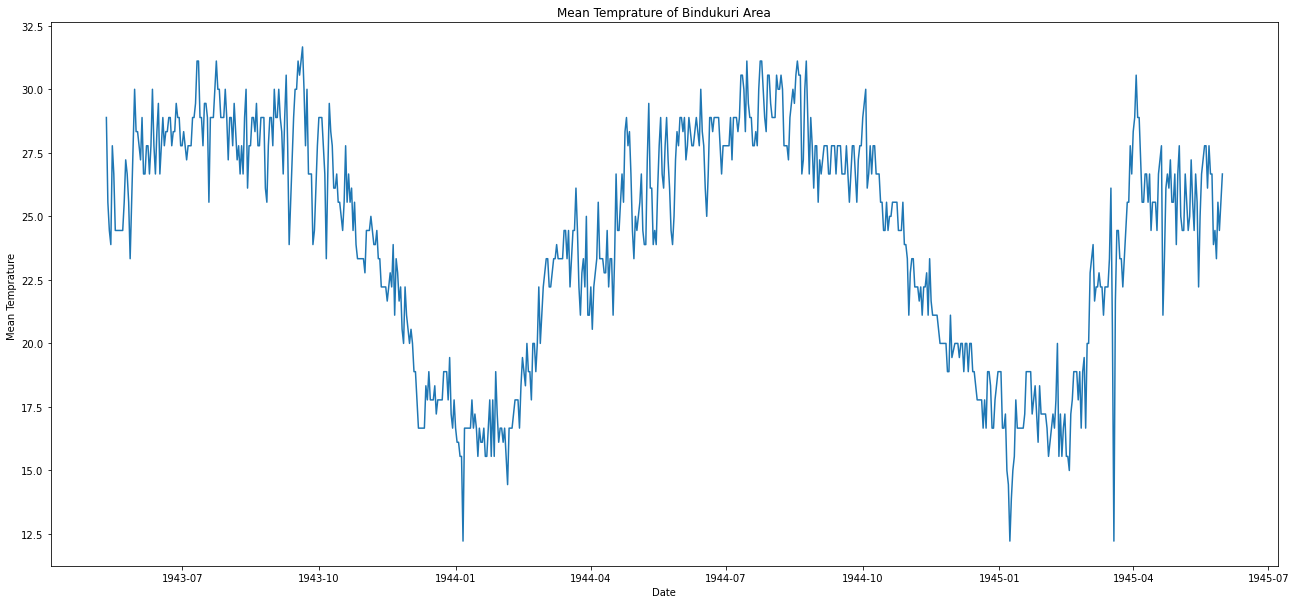

In [7]:
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temprature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temprature ")
plt.show()

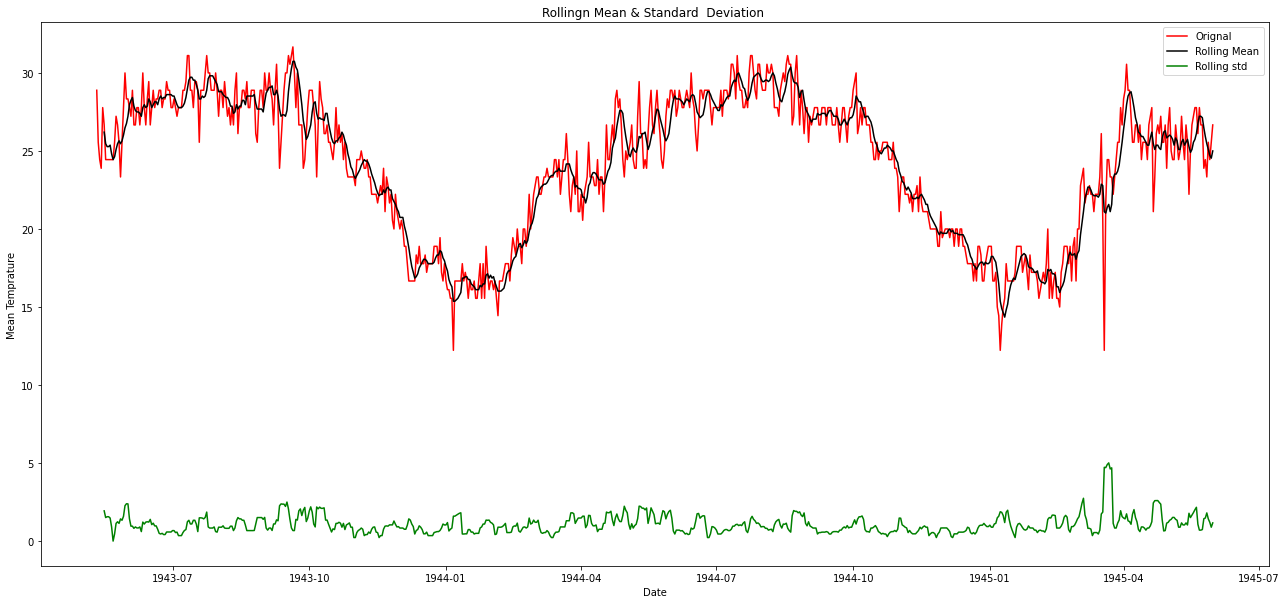

Test Statistics  -1.409596674588777
p-value 0.577666802852635
Critical Value: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [12]:
# To check Stationarity of time searies 
from statsmodels.tsa.stattools import adfuller
def cal_adfuller(ts):
    result=adfuller(ts.MeanTemp)
    print('Test Statistics ',result[0])
    print('p-value',result[1])
    print('Critical Value:',result[4])
    
def plotting_rolling_stats(ts):
    rolmean=ts.rolling(6).mean()# 6 is window size
    rolstd=ts.rolling(6).std()
    
    plt.figure(figsize=(22,10))
    orig=plt.plot(ts,color='red',label='Orignal')
    mean=plt.plot(rolmean,color='black',label='Rolling Mean')
    std=plt.plot(rolstd,color='green',label='Rolling std')
    
    plt.xlabel("Date")
    plt.ylabel("Mean Temprature")
    plt.title("Rollingn Mean & Standard  Deviation ")
    plt.legend()
    plt.show()
    
timeseries=weather_bin.loc[:,['Date','MeanTemp']]
timeseries.index=timeseries.Date
ts=timeseries.drop("Date",axis=1)
plotting_rolling_stats(ts)
cal_adfuller(ts)

In [ ]:
#Test for stationarity: If the test statistic is less than the critical value, we fail to reject the null hypothesis (aka the series is not stationary).